## Testing the generated embeddings

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
# Load the saved embeddings
embeddings = np.load('b_scan_embeddings.npy')

# 1. Check Shape
print("Embeddings shape:", embeddings.shape)
expected_shape = (100, 768)  # 100 B-scans, 768 dimensions for vit-base
if embeddings.shape == expected_shape:
    print("Shape is correct!")
else:
    print("Warning: Shape does not match expected (100, 768)")

Embeddings shape: (100, 768)
Shape is correct!


In [5]:
# 2. Inspect Values
print("Sample embedding (first B-scan):", embeddings[0][:10])  # Print first 10 values
min_val, max_val = np.min(embeddings), np.max(embeddings)
print(f"Range of values: [{min_val}, {max_val}]")

Sample embedding (first B-scan): [-0.70979816  1.0115967   0.74702007  0.17448165  0.36336666 -0.2677143
  0.5900978   0.7157444  -1.0724611  -0.27541935]
Range of values: [-3.5738208293914795, 4.110490798950195]


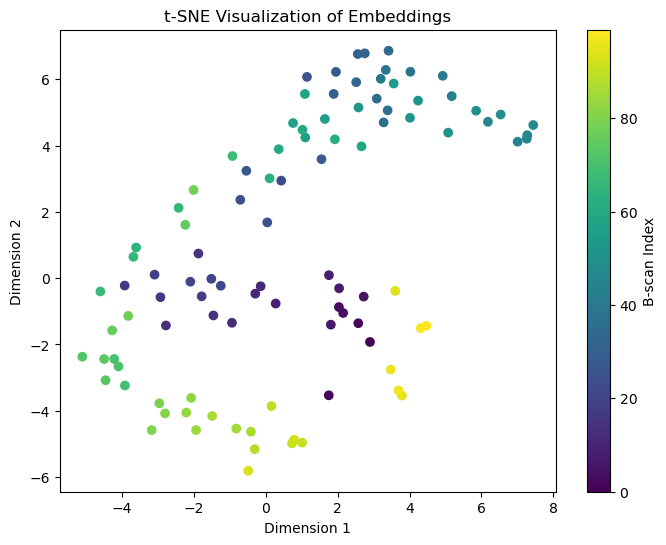

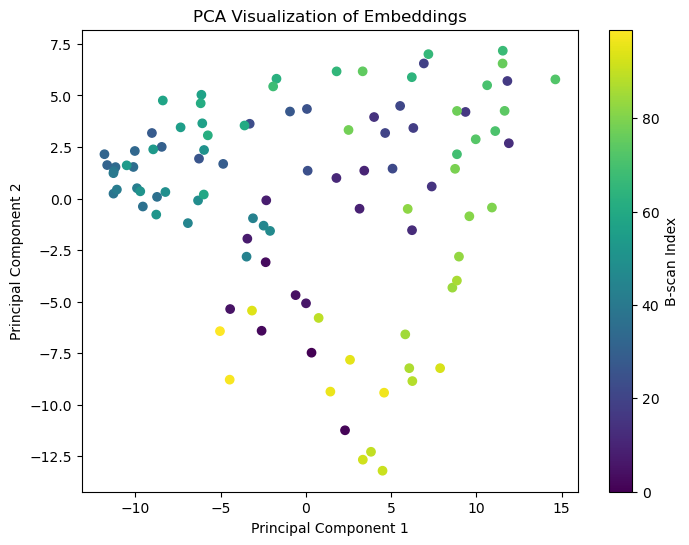

In [6]:
# 3. Visualize with t-SNE (reduce to 2D for plotting)
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=range(100), cmap='viridis')
plt.colorbar(label='B-scan Index')
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# 4. Optional: Basic PCA for another view
pca = PCA(n_components=2)
embeddings_2d_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1], c=range(100), cmap='viridis')
plt.colorbar(label='B-scan Index')
plt.title('PCA Visualization of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
